In [2]:
# Standard library imports
import csv
import itertools
import os
import os.path
import random
from glob import glob
from pathlib import Path
import zlib
import importlib

# Third-party imports
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import skimage
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.transform import resize
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import (KFold, StratifiedKFold, cross_val_score,
                                     learning_curve, train_test_split)
from sklearn.utils import class_weight, shuffle
from tqdm import tqdm
import foolbox as fb
import tensorflow as tf
import eagerpy as ep


# Keras-specific imports
import keras
from keras import backend as K
from keras import layers, models, optimizers
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import (Activation, AveragePooling2D, BatchNormalization,
                          Conv2D, Dense, Dropout, Flatten, Lambda, MaxPool2D,
                          MaxPooling2D)
from keras.models import Model, Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.utils import to_categorical

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [29]:
model = tf.keras.models.load_model('assets/models/ASL_DNN_3D.h5')
fmodel = fb.TensorFlowModel(model, bounds=(0, 1), preprocessing=None)

In [26]:
X_test_pca = np.load("assets/data/X_test_pca.npy")
y_test = np.load("assets/data/y_test.npy")
y_testHot = np.load("assets/data/y_testHot.npy")
X_test = np.load("assets/data/X_test.npy")

In [21]:
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "delete", "nothing", "space"]

### Attack

In [32]:
from foolbox.attacks import L2PGD

attack = L2PGD()

# Choose an image and label from your test set
image, label = X_test[0], y_test[0]
#image = ep.astensor(np.expand_dims(image, axis=0)) 

label = np.array([label])
label = ep.astensor(label)


In [33]:
epsilons = np.linspace(0.0, 0.005, num=20)

# Apply the attack
adversarial_image, adversarial_label, success = attack(fmodel, image, criterion=fb.criteria.Misclassification(label), epsilons=epsilons)

# Check if the attack was successful
if success:
    print("Attack successful!")
else:
    print("Attack failed.")


NotImplementedError: 

___

In [44]:
# Wrap your model into a Foolbox model
fmodel = fb.TensorFlowModel(model, bounds=(0, 1), preprocessing=None)

# Choose an attack method, e.g., FGSM (Fast Gradient Sign Method)
attack = fb.attacks.FGSM()

In [49]:
# Prepare an example input image and its correct label
import numpy as np
image = np.random.rand(1, 50, 50, 3).astype(np.float32) # Example image
image = tf.convert_to_tensor(image, dtype=tf.float32)  # Convert to TensorFlow tensor

label = np.array([3]) # Example true label

In [69]:
images = X_test
#images_expanded = images.reshape((-1, 1, 50, 50, 3))

mages = tf.convert_to_tensor(images, dtype=tf.float32)  # Convert to TensorFlow tensor

labels = y_test

In [102]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(batch_idx, original_images, adversarial_images, labels, n=5):
    num_images_to_plot = min(n, len(original_images))
    plt.figure(figsize=(10, 6))  # Adjusted for three rows of images
    
    for i in range(num_images_to_plot):
        # Plot original images
        plt.subplot(3, num_images_to_plot, i + 1)
        plt.imshow(original_images[i])
        plt.title(f"Orig: {labels[i]}")
        plt.axis('off')
        
        # Calculate noise/difference and amplify for visualization
        noise = adversarial_images[i] - original_images[i]
        # Normalize the noise to [0, 1] for visualization
        noise_normalized = (noise - noise.min()) / (noise.max() - noise.min())
        plt.subplot(3, num_images_to_plot, num_images_to_plot + i + 1)
        plt.imshow(noise_normalized, cmap='viridis')  # Using a colormap to enhance visibility
        plt.title("Amplified Noise")
        plt.axis('off')
        
        # Plot adversarial images
        plt.subplot(3, num_images_to_plot, 2 * num_images_to_plot + i + 1)
        adv_img = adversarial_images[i] if adversarial_images.ndim == 4 else adversarial_images
        plt.imshow(adv_img)
        plt.title("Adv")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


Batch 0 success rate: 0.97


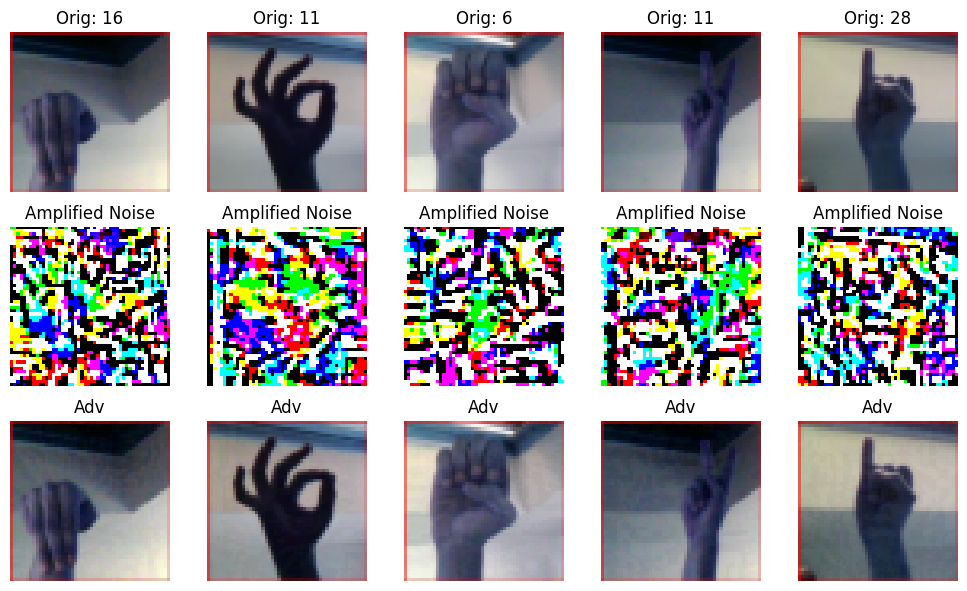

Batch 1 success rate: 0.975


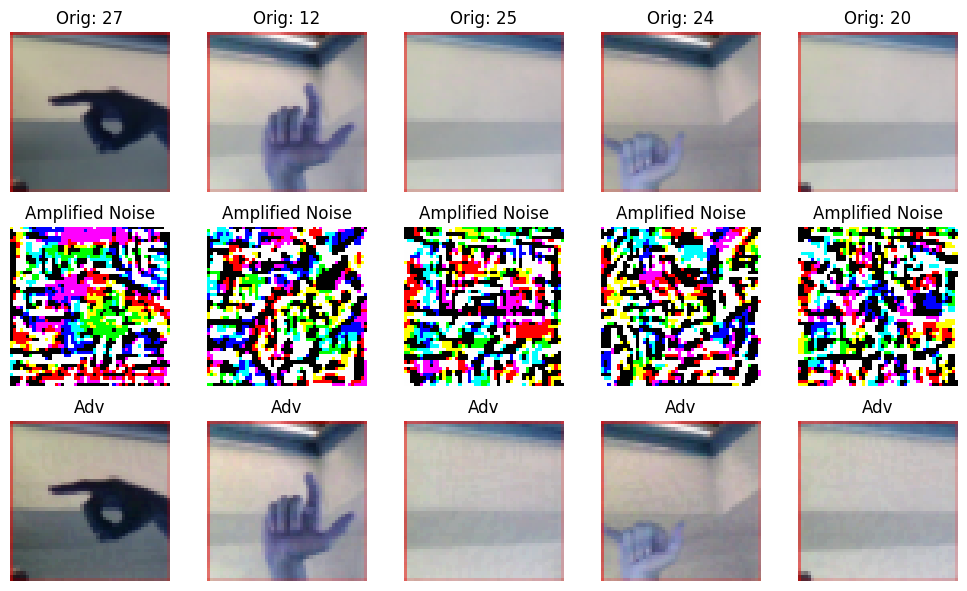

Batch 2 success rate: 0.985


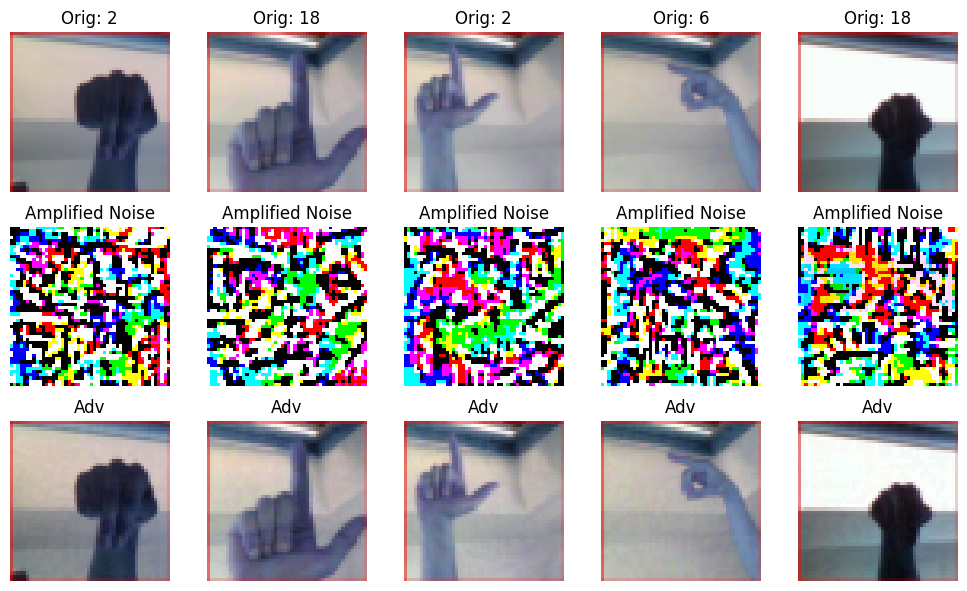

Batch 3 success rate: 0.965


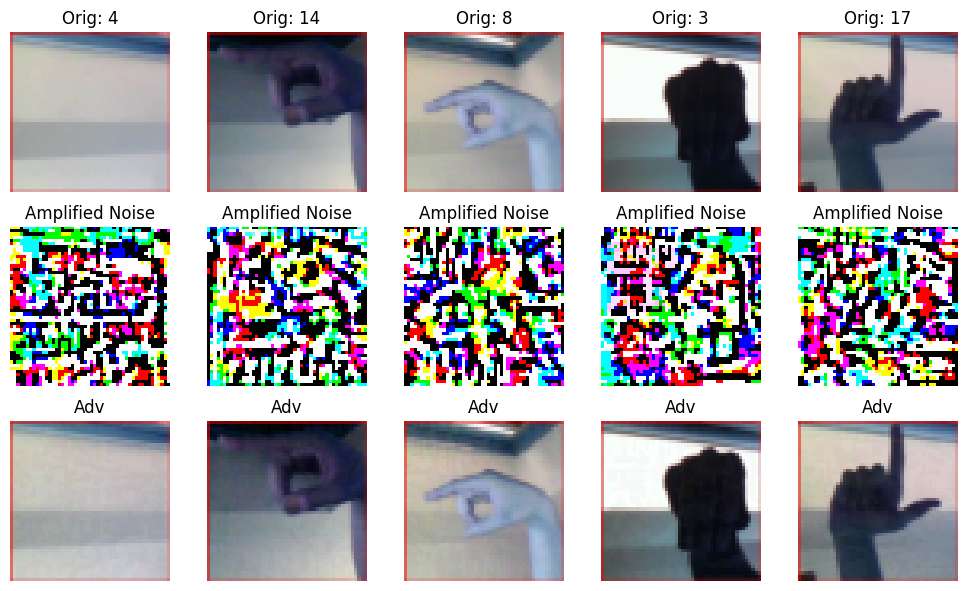

Batch 4 success rate: 0.995


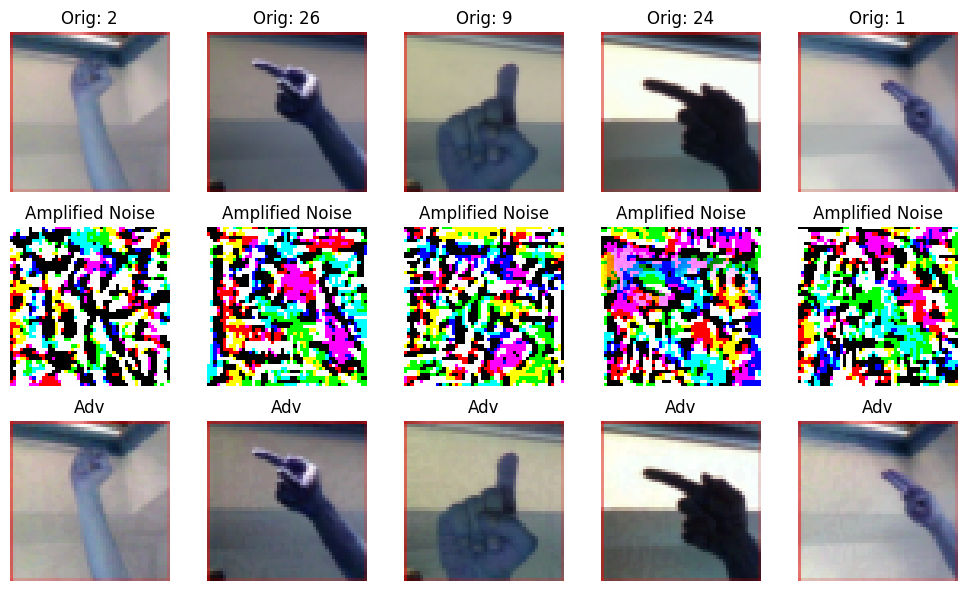

Batch 5 success rate: 0.965


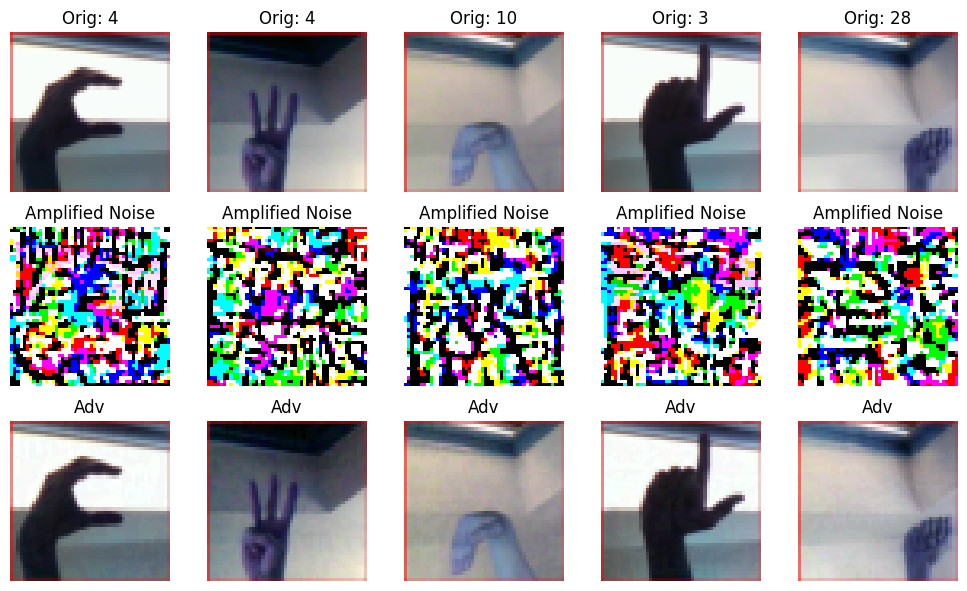

Batch 6 success rate: 0.97


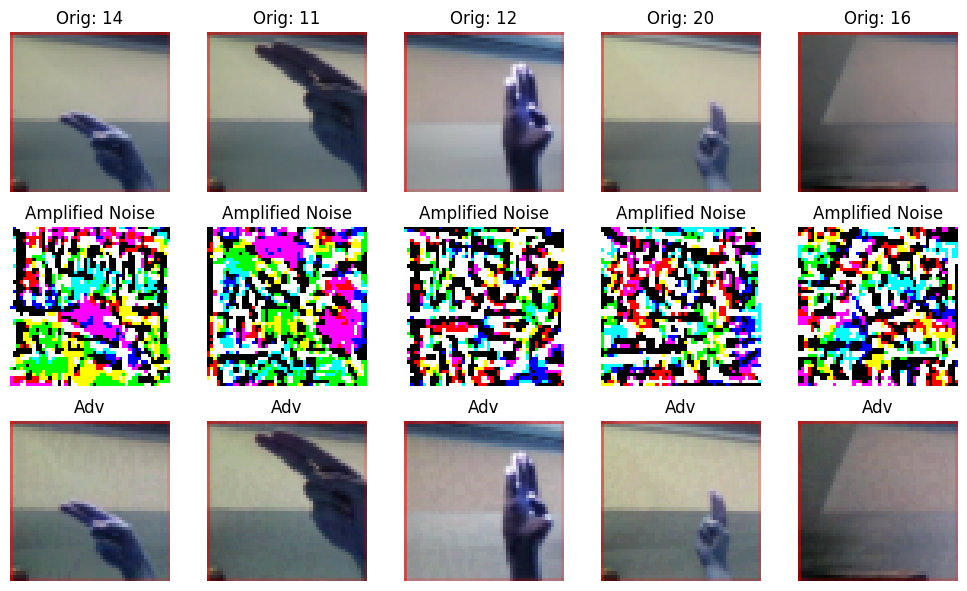

Batch 7 success rate: 1.0


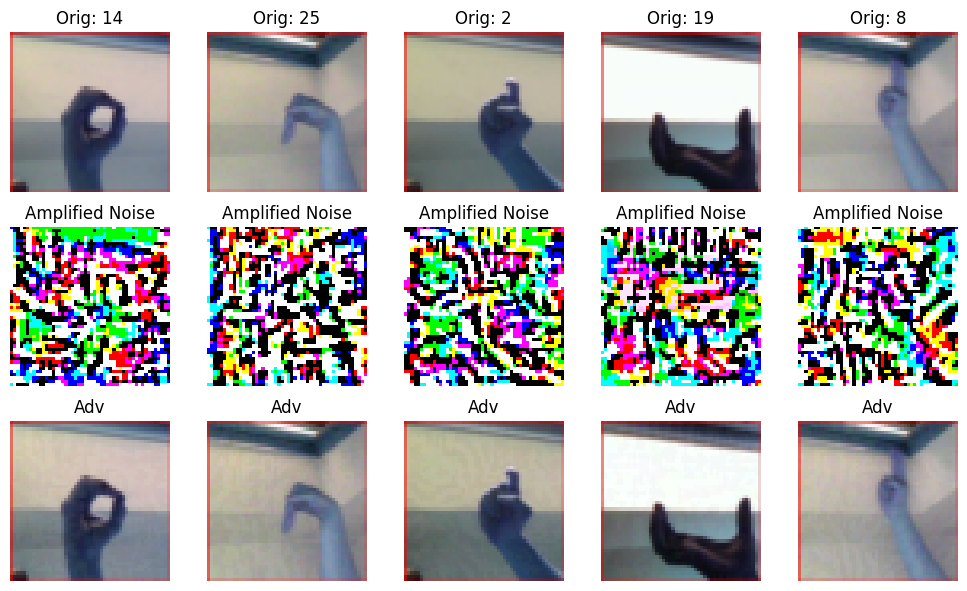

Batch 8 success rate: 0.97


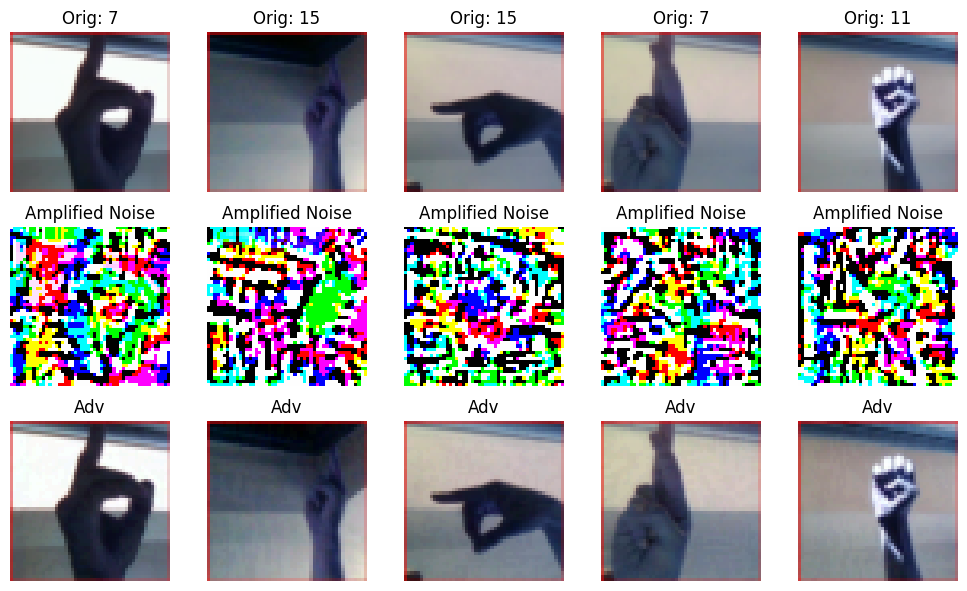

Batch 9 success rate: 0.98


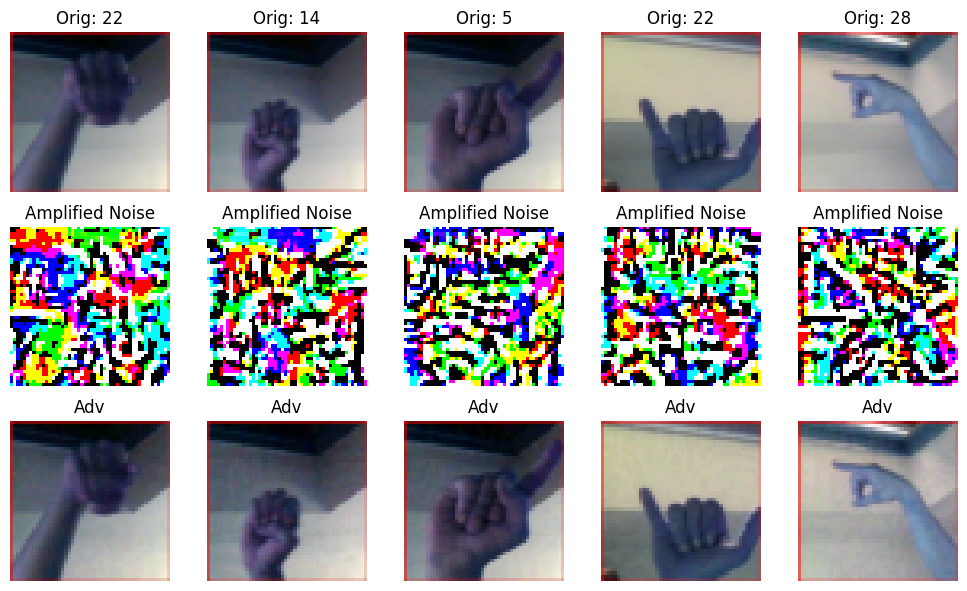

Batch 10 success rate: 0.965


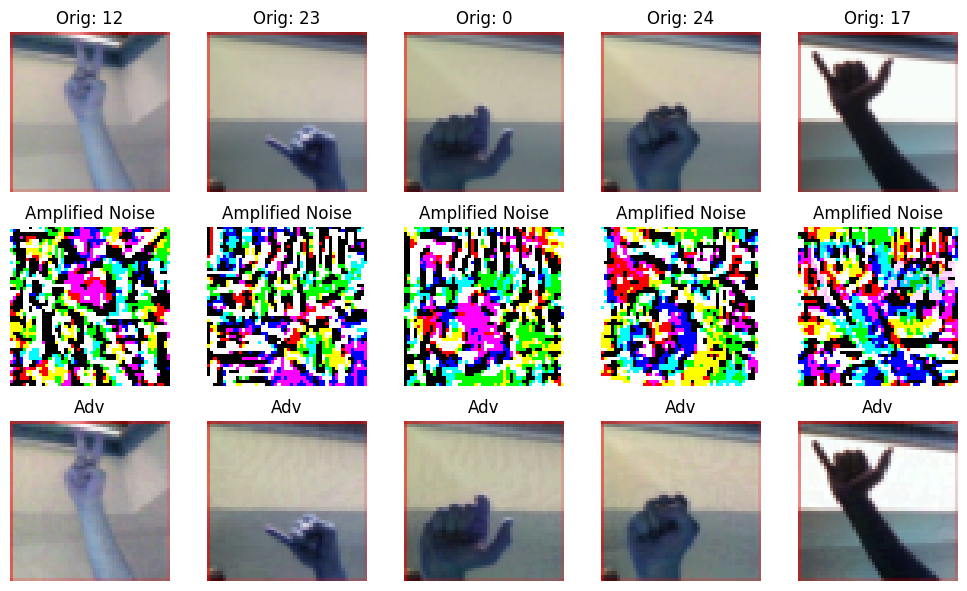

Batch 11 success rate: 1.0


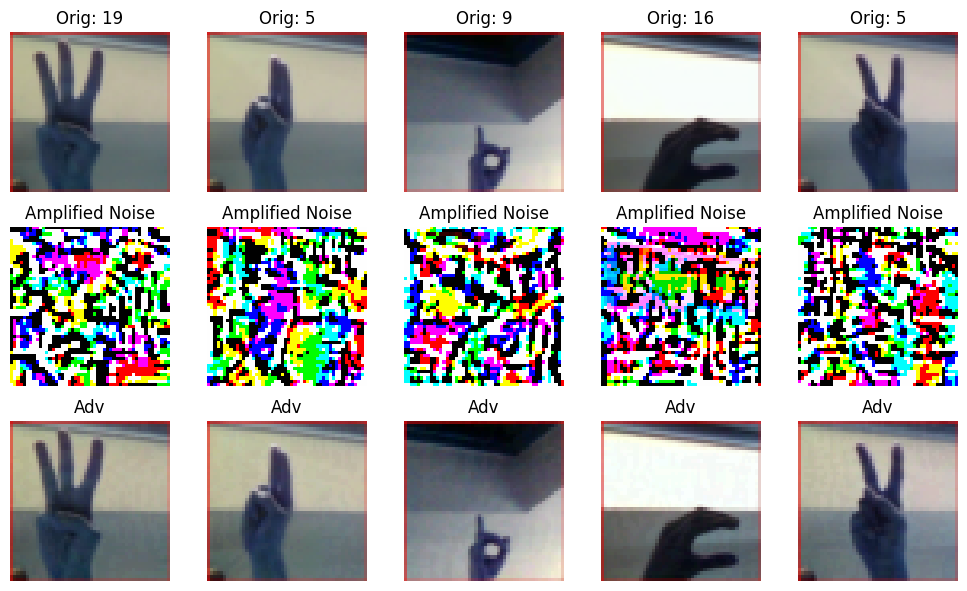

Batch 12 success rate: 0.99


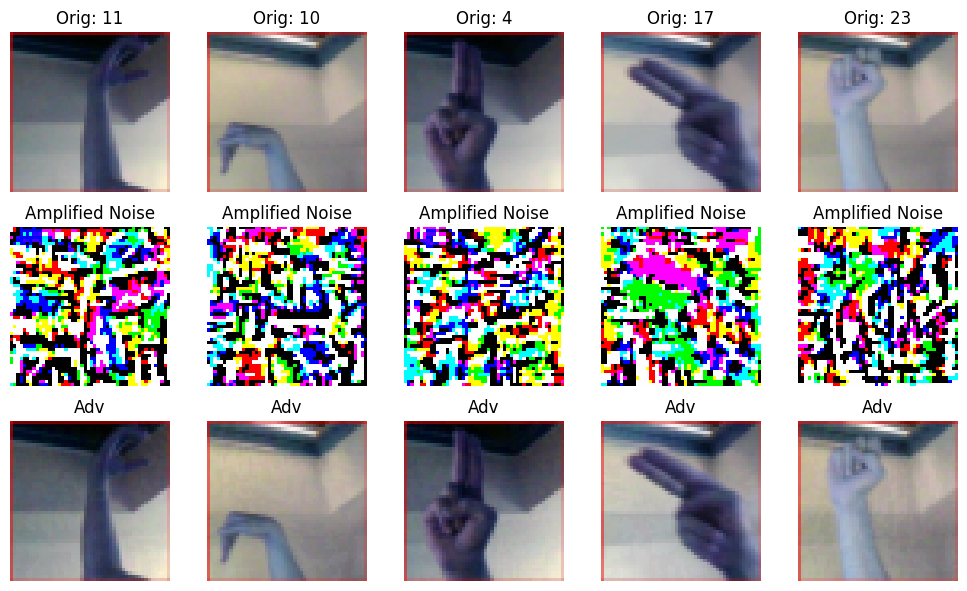

Batch 13 success rate: 0.99


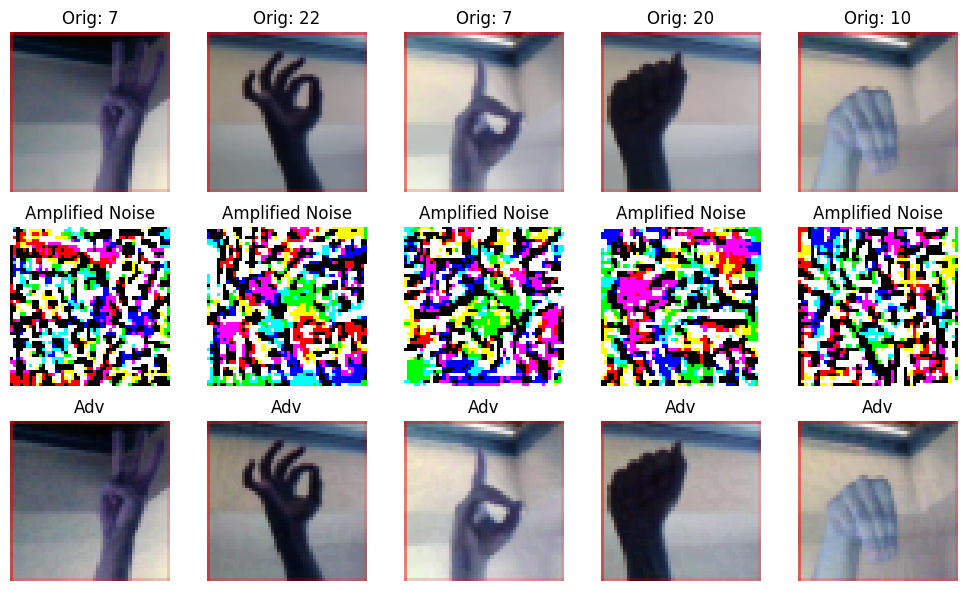

Batch 14 success rate: 0.97


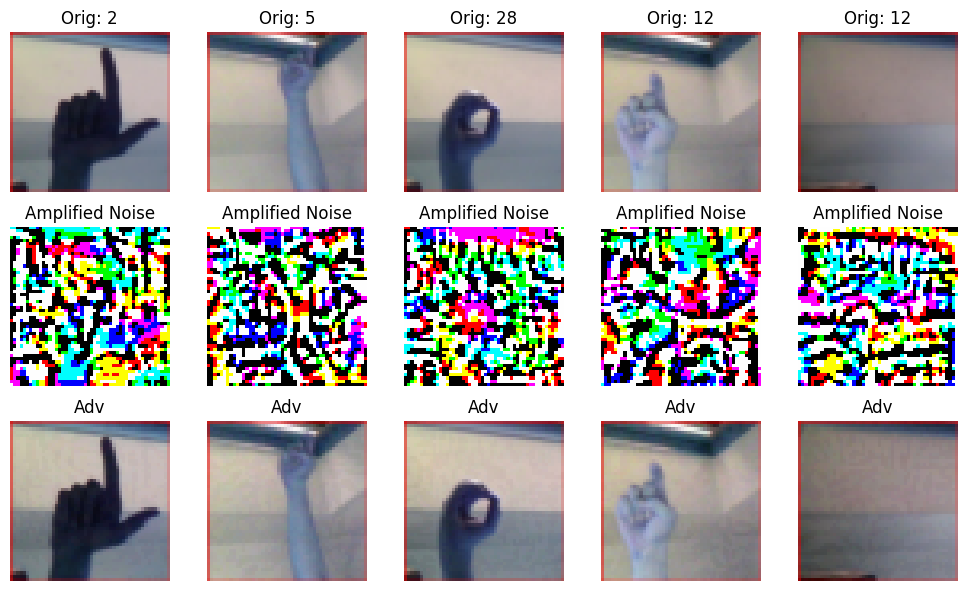

Batch 15 success rate: 0.99


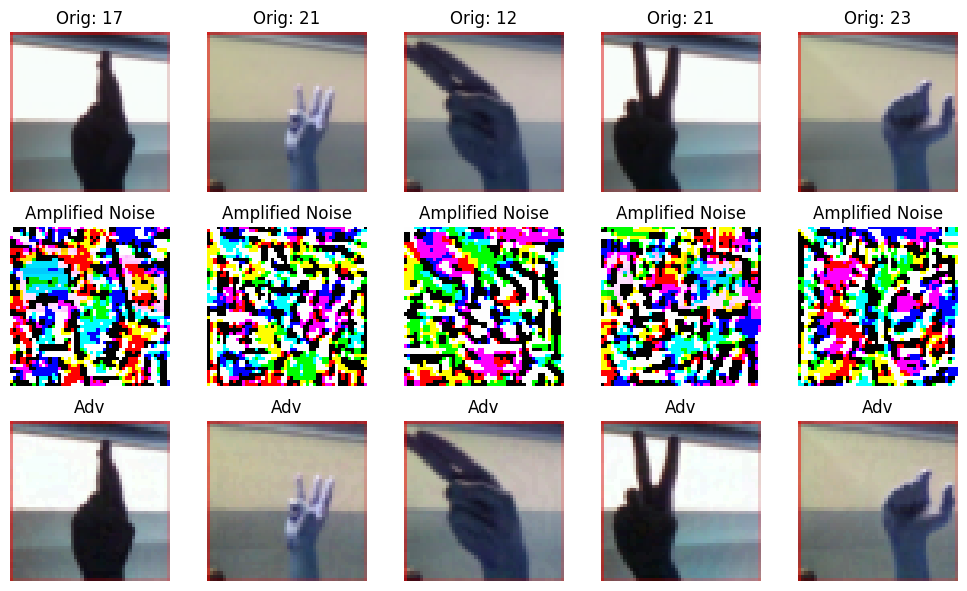

Batch 16 success rate: 0.985


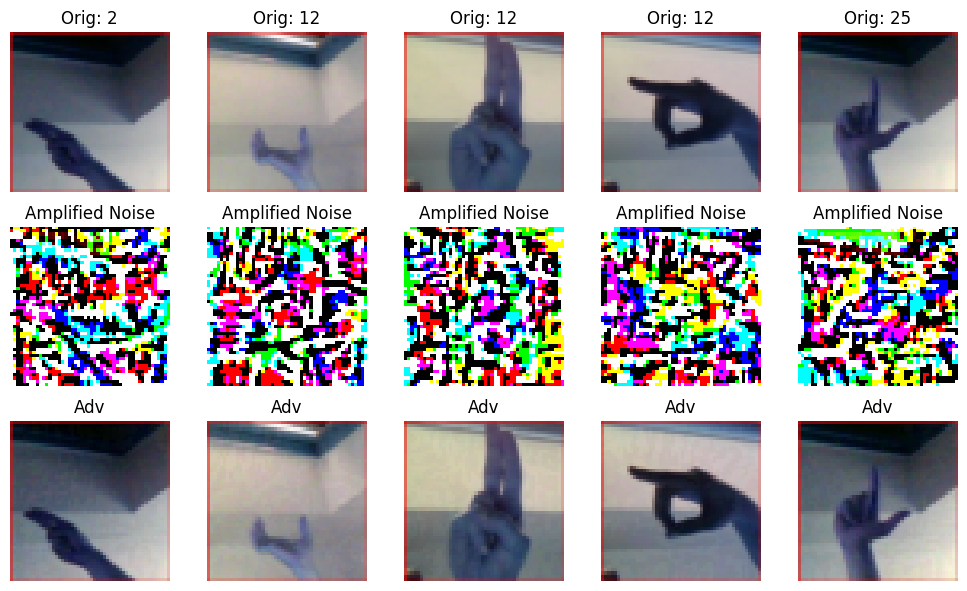

Batch 17 success rate: 0.985


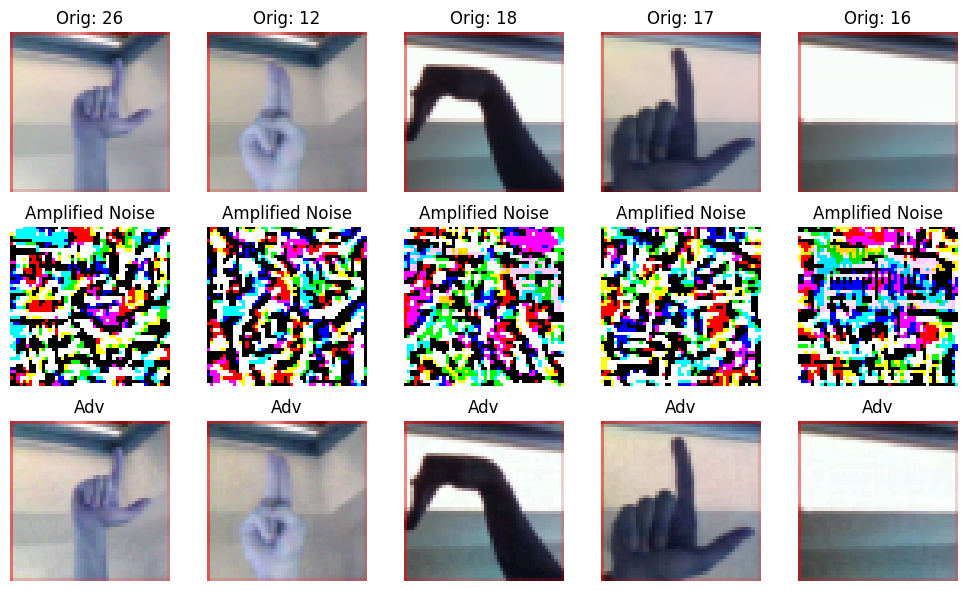

Batch 18 success rate: 0.995


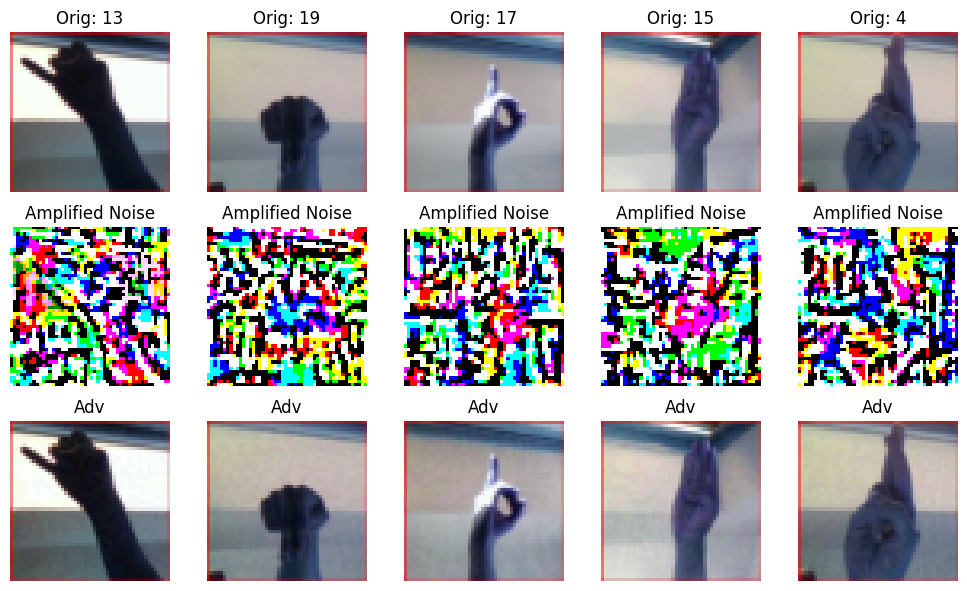

Batch 19 success rate: 0.955


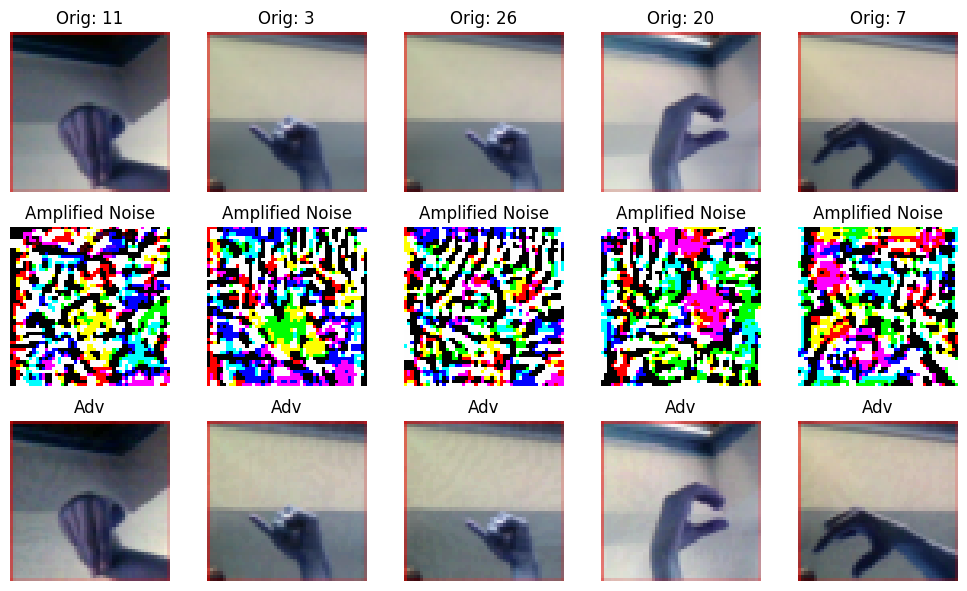

Batch 20 success rate: 0.995


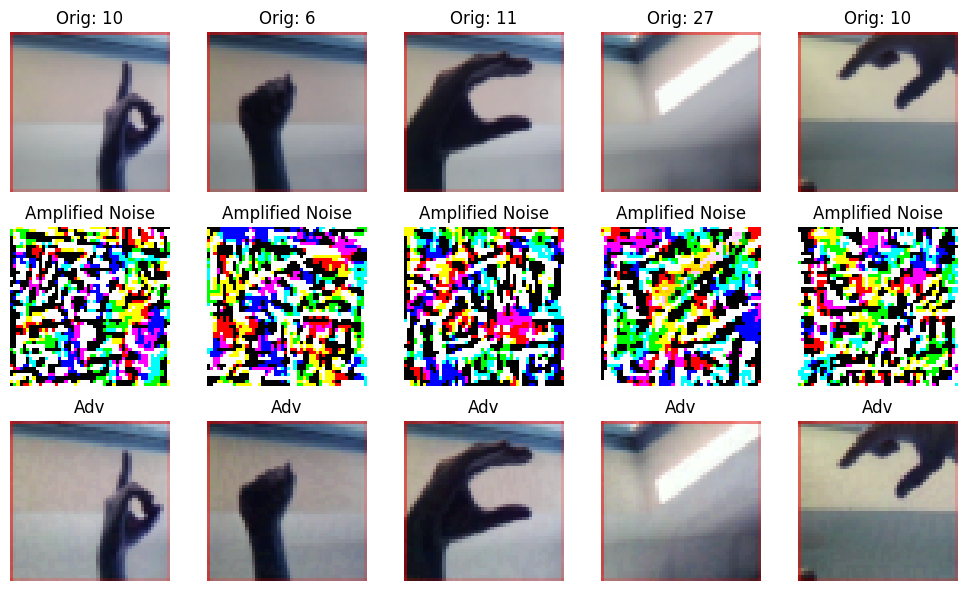

Batch 21 success rate: 0.995


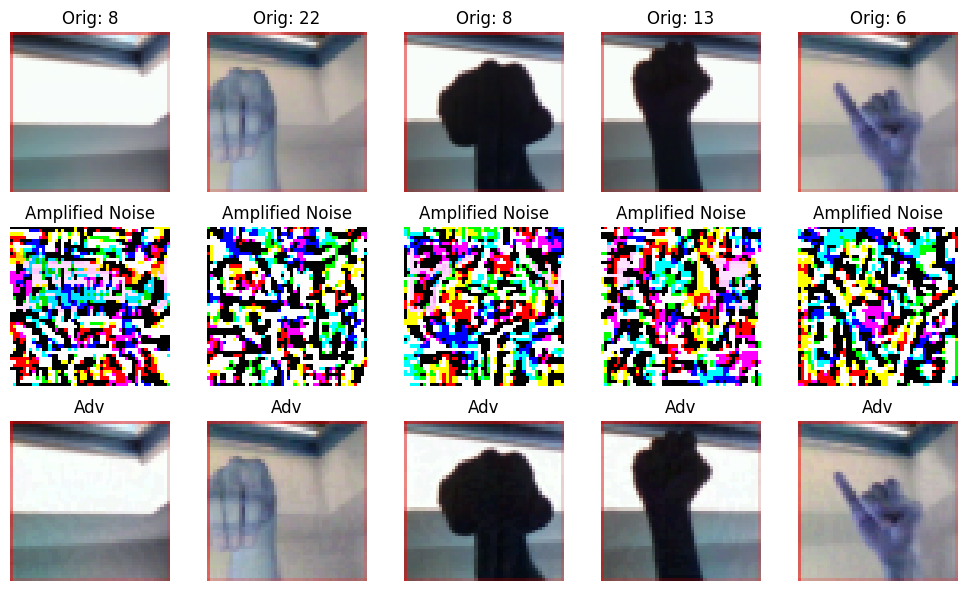

Batch 22 success rate: 0.97


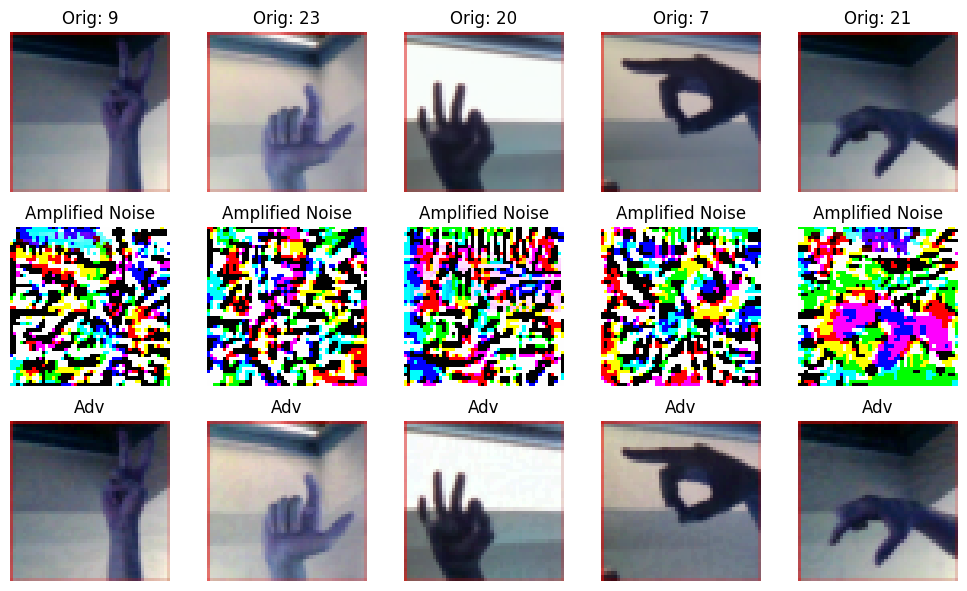

Batch 23 success rate: 1.0


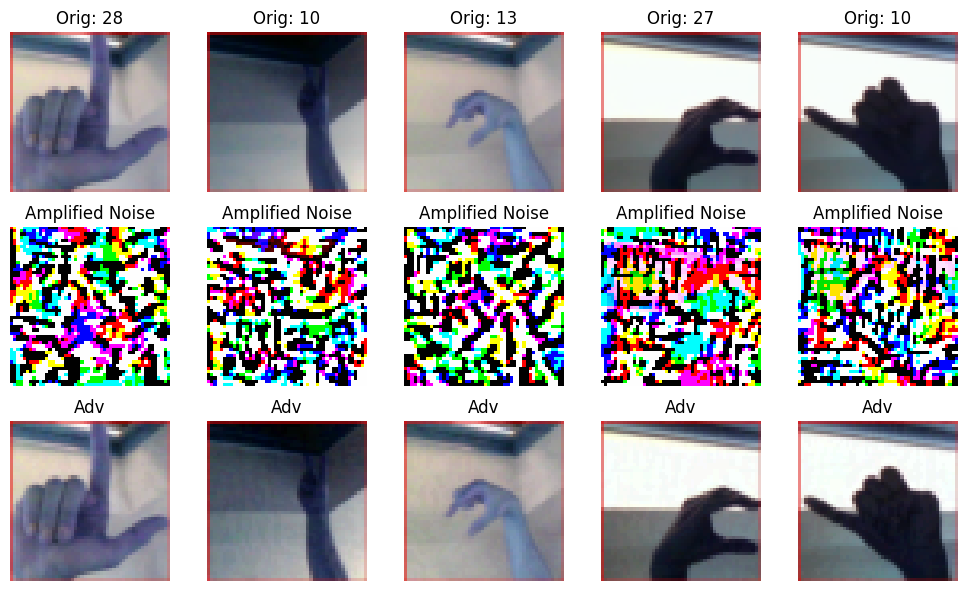

Batch 24 success rate: 0.965


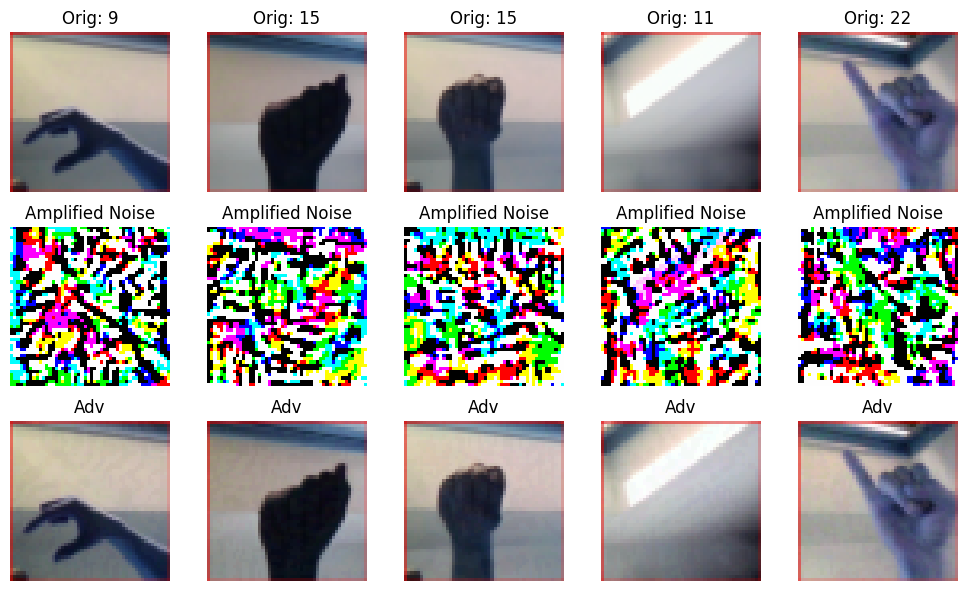

Batch 25 success rate: 0.985


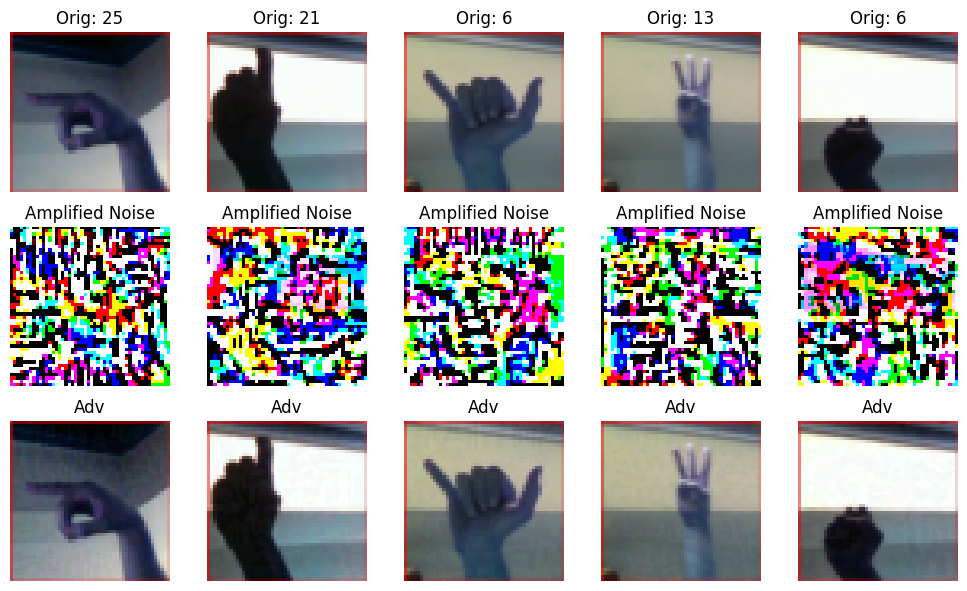

Batch 26 success rate: 1.0


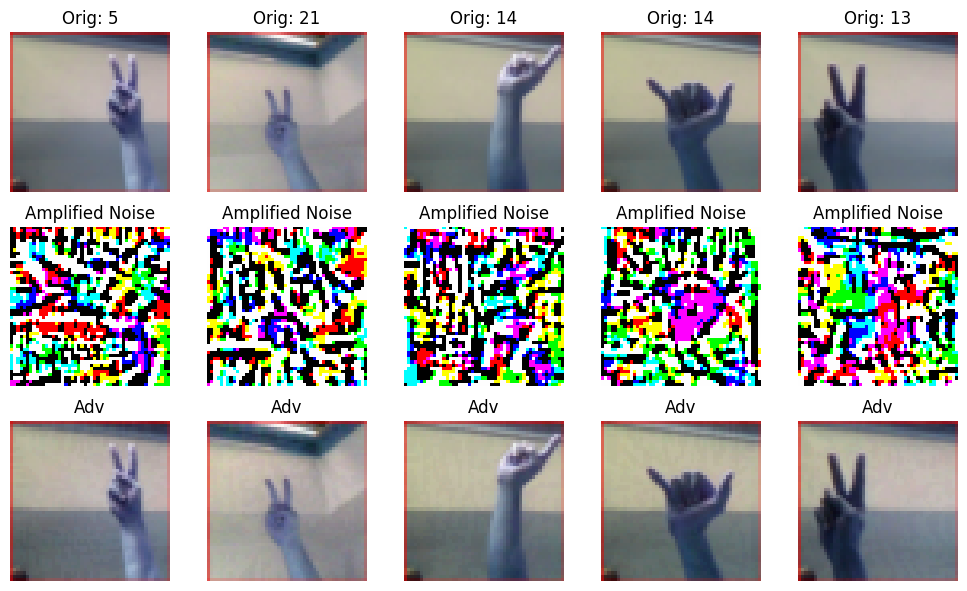

Batch 27 success rate: 0.985


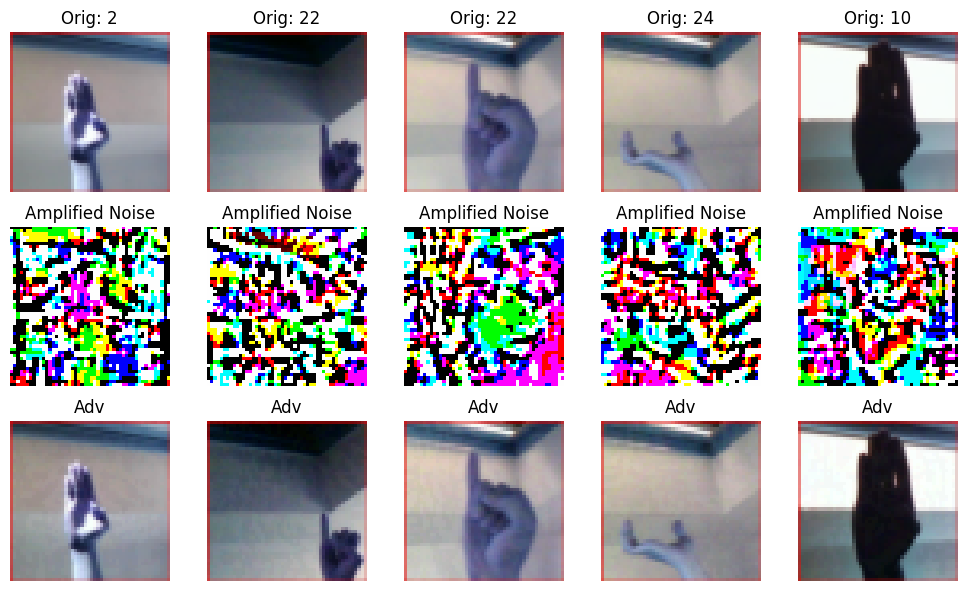

Batch 28 success rate: 0.985


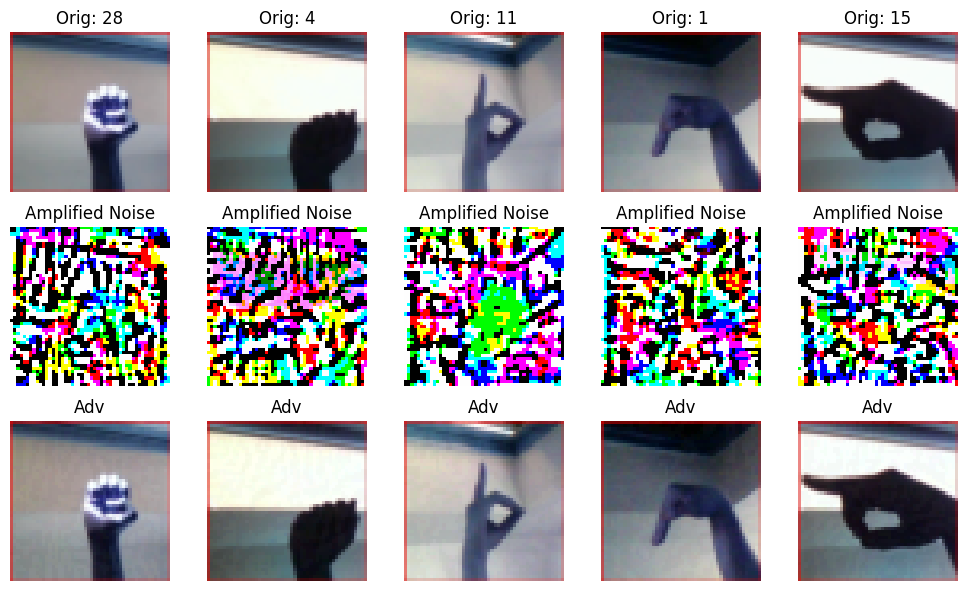

Batch 29 success rate: 0.96


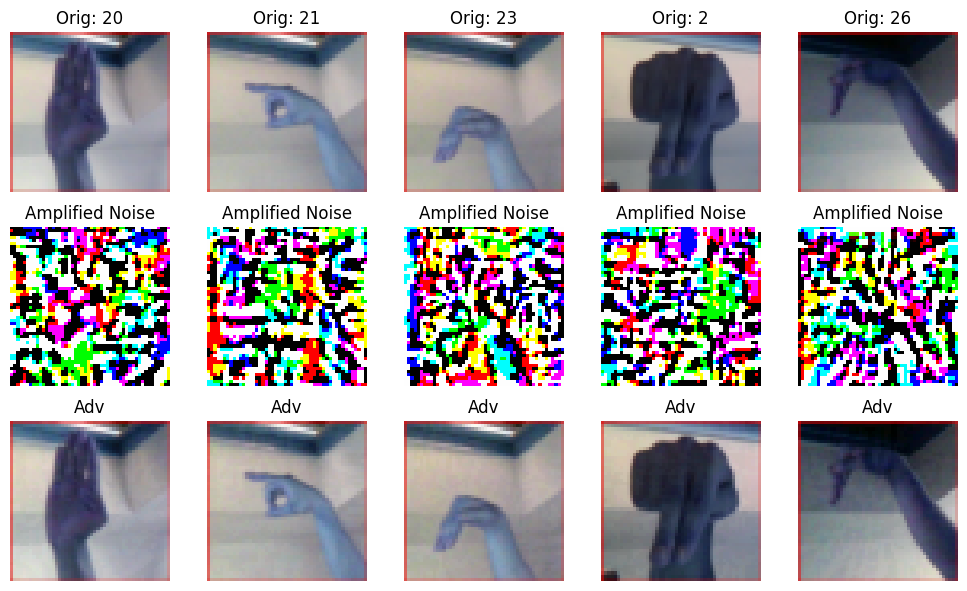

Batch 30 success rate: 1.0


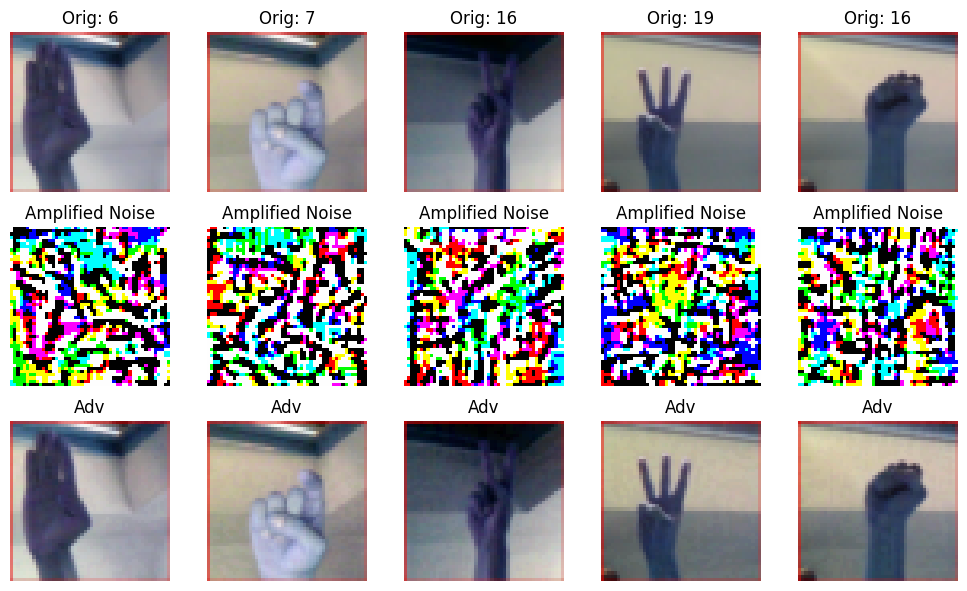

Batch 31 success rate: 0.975


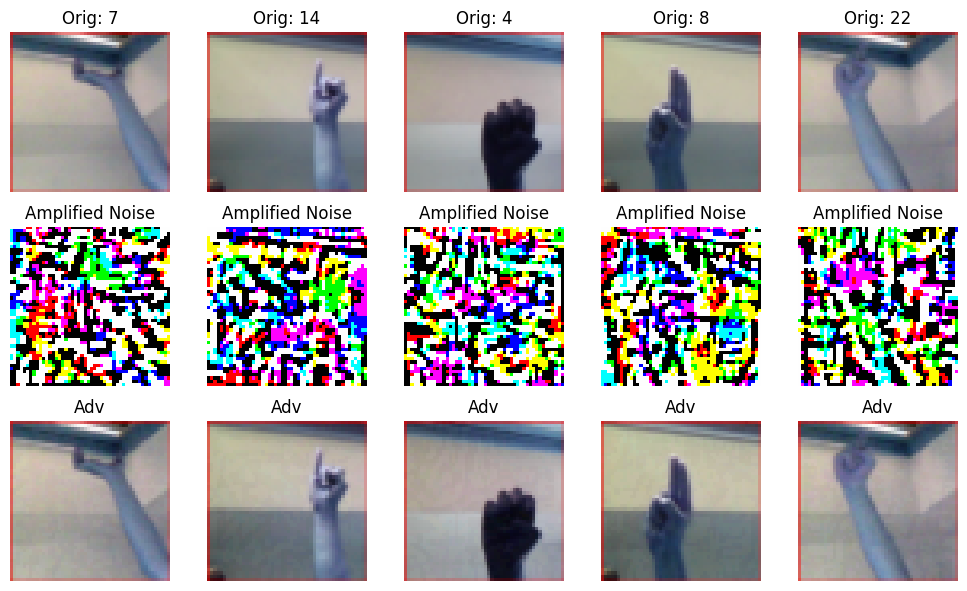

Batch 32 success rate: 0.995


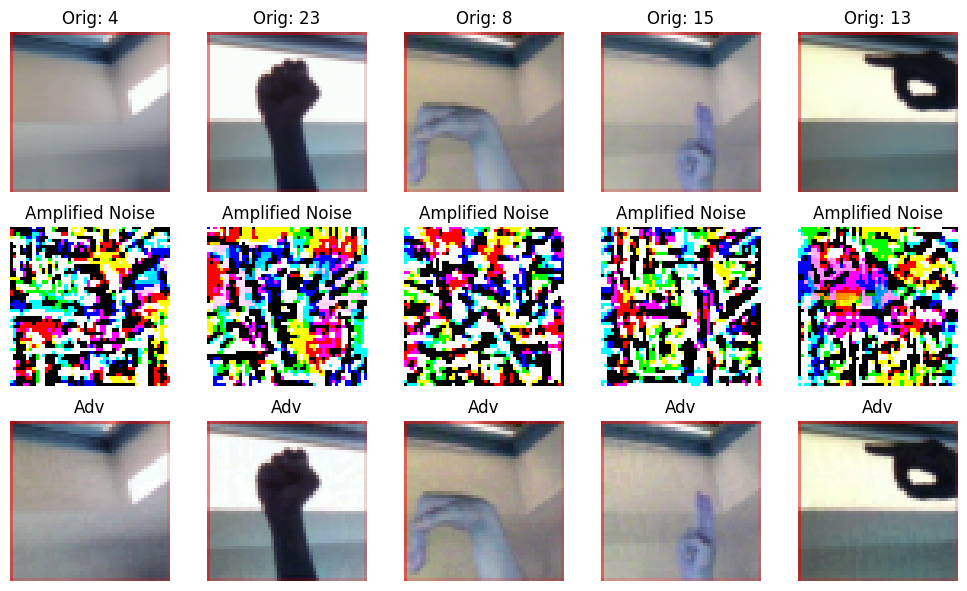

Batch 33 success rate: 1.0


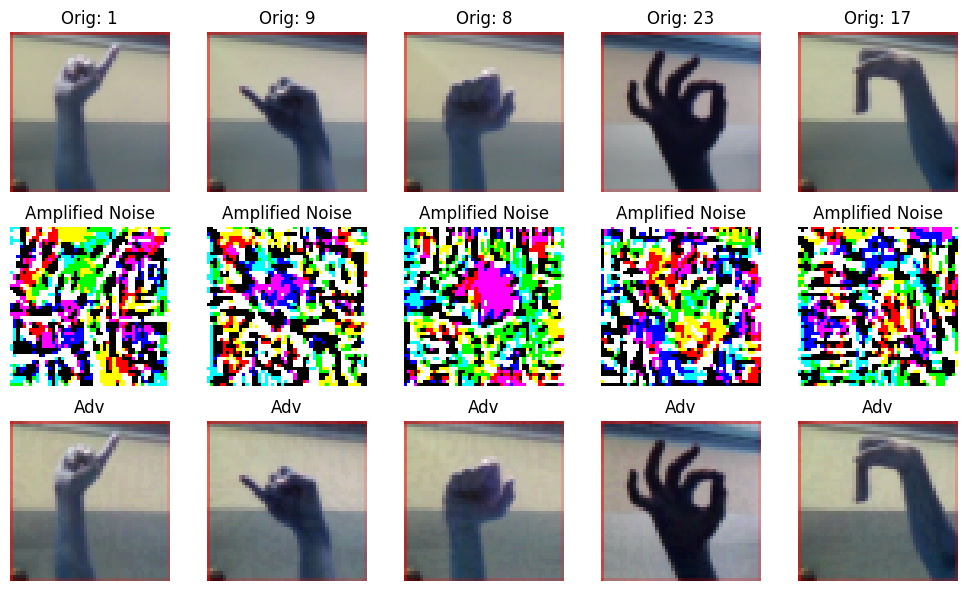

Batch 34 success rate: 0.97


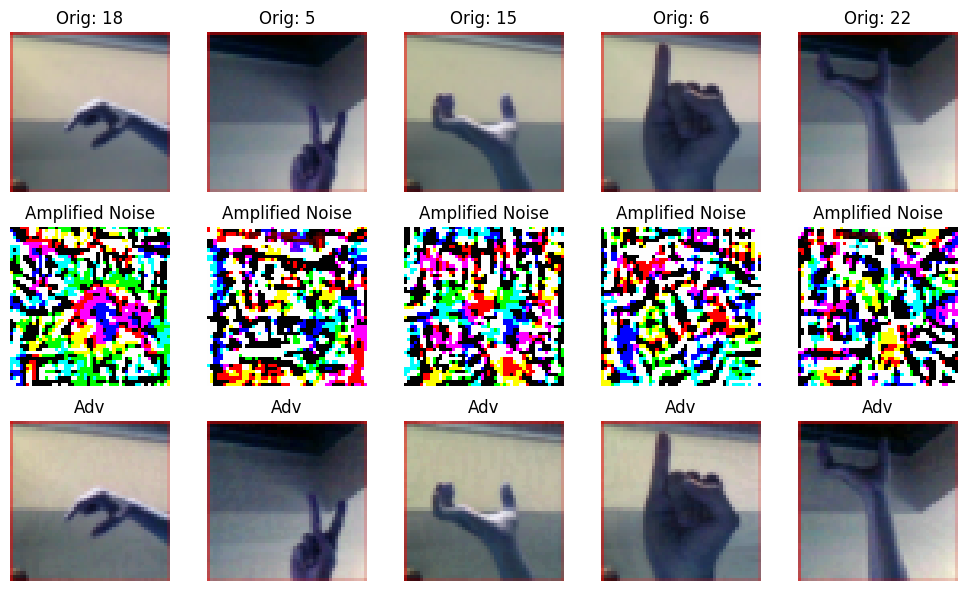

Batch 35 success rate: 0.955


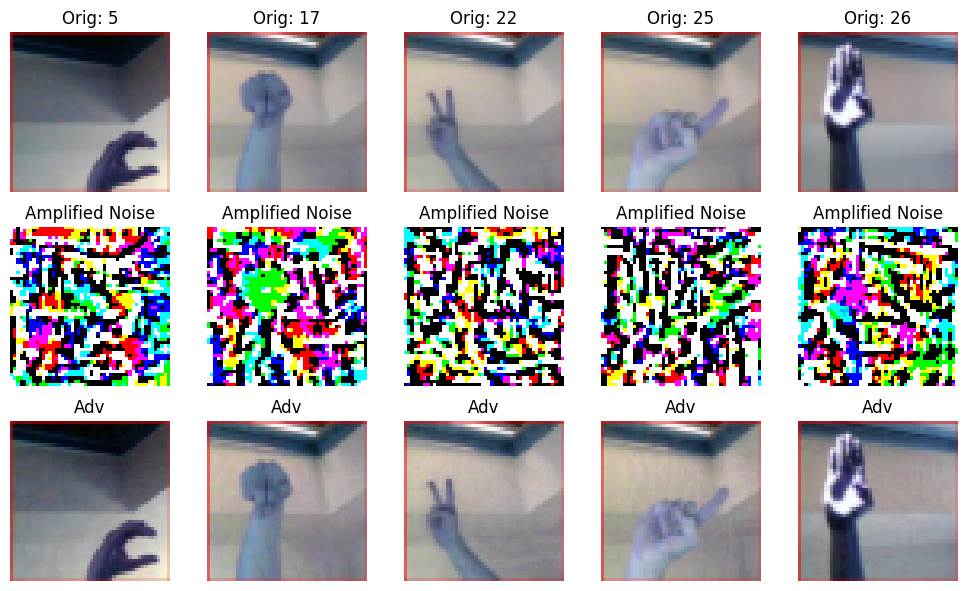

Batch 36 success rate: 1.0


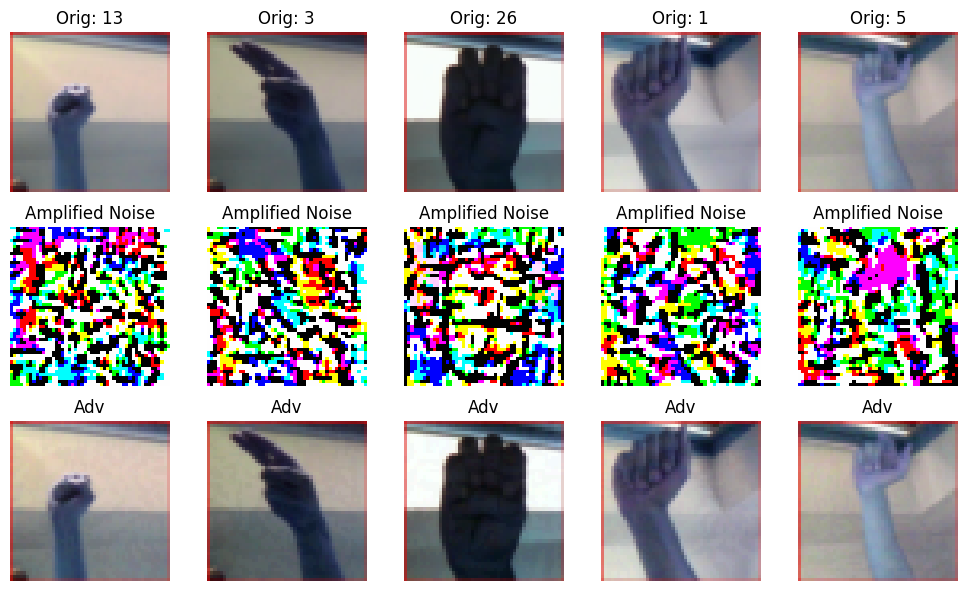

Batch 37 success rate: 0.985


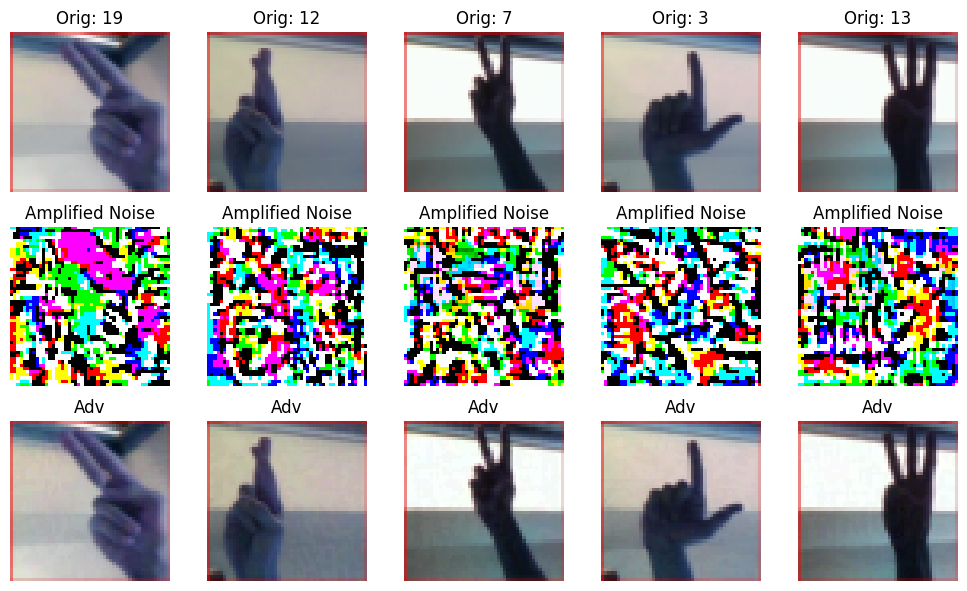

Batch 38 success rate: 0.985


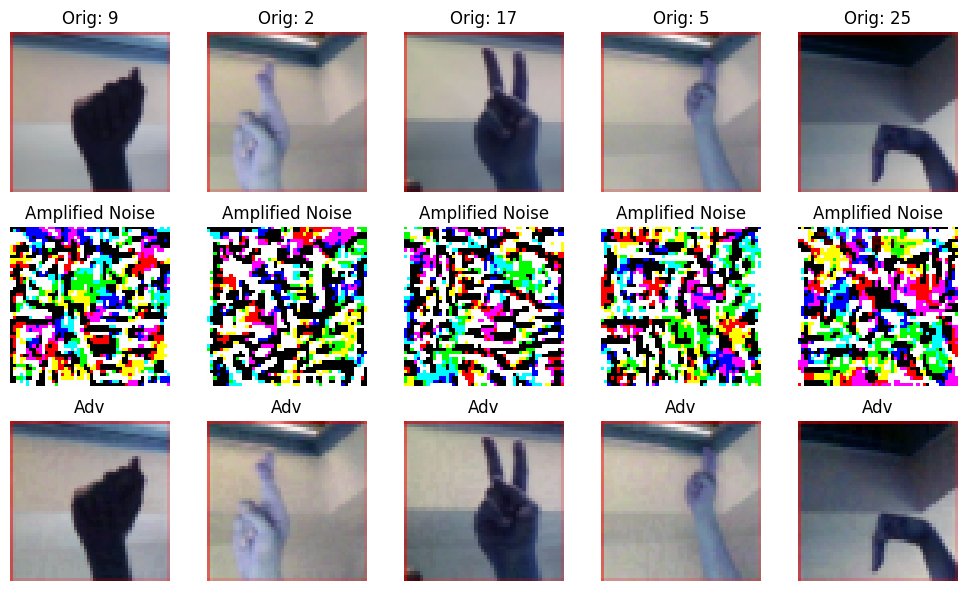

Batch 39 success rate: 0.975


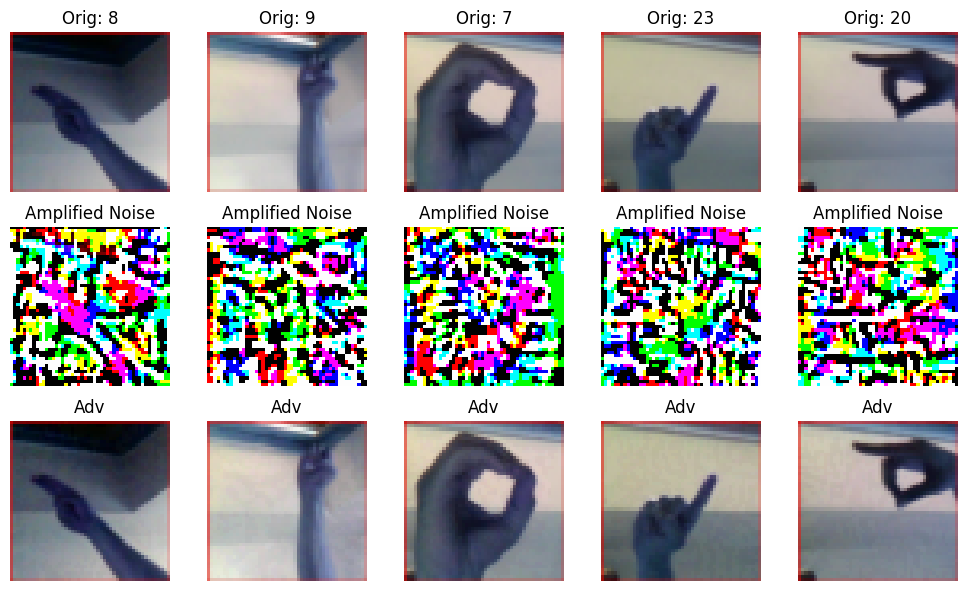

Batch 40 success rate: 0.98


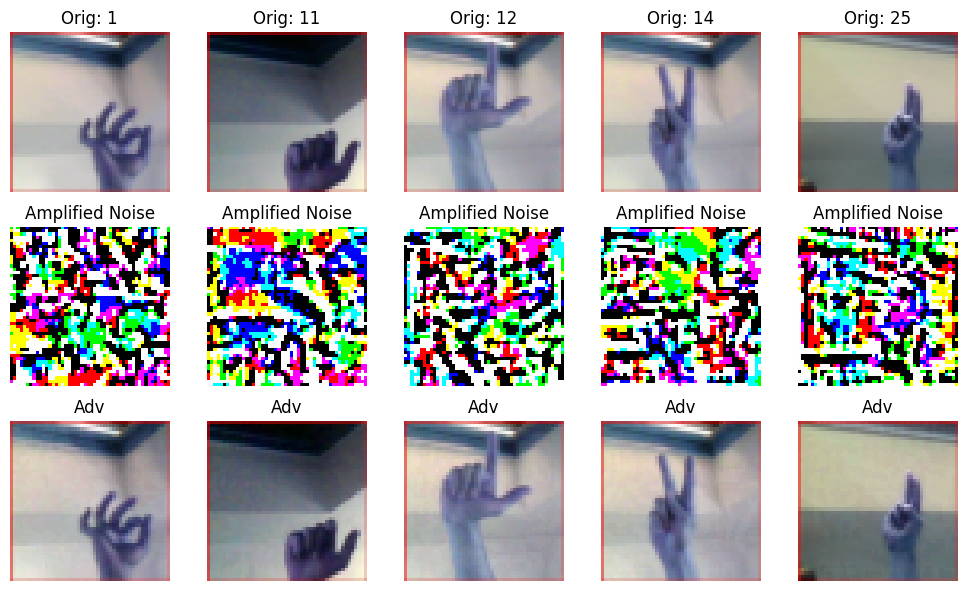

Batch 41 success rate: 1.0


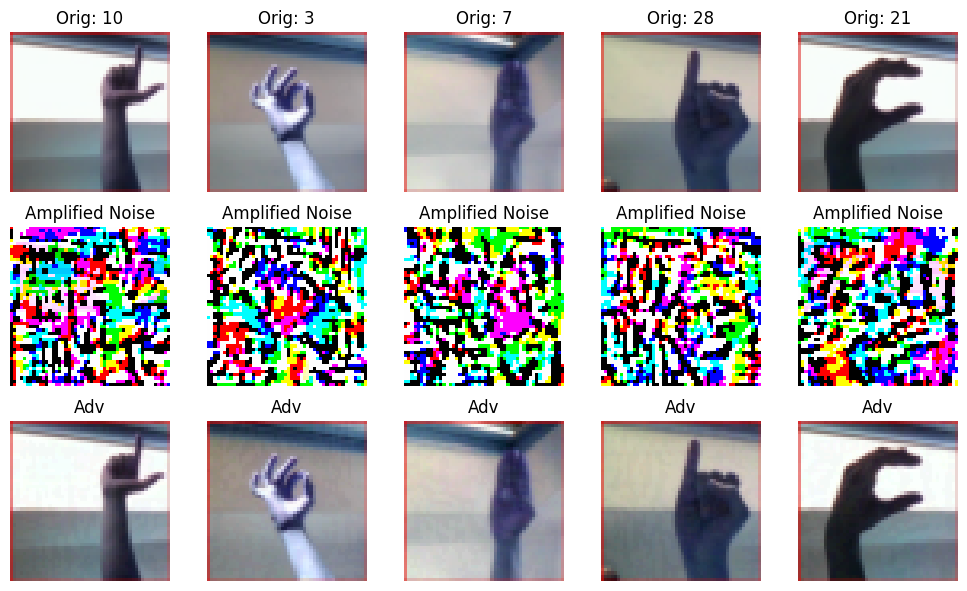

Batch 42 success rate: 1.0


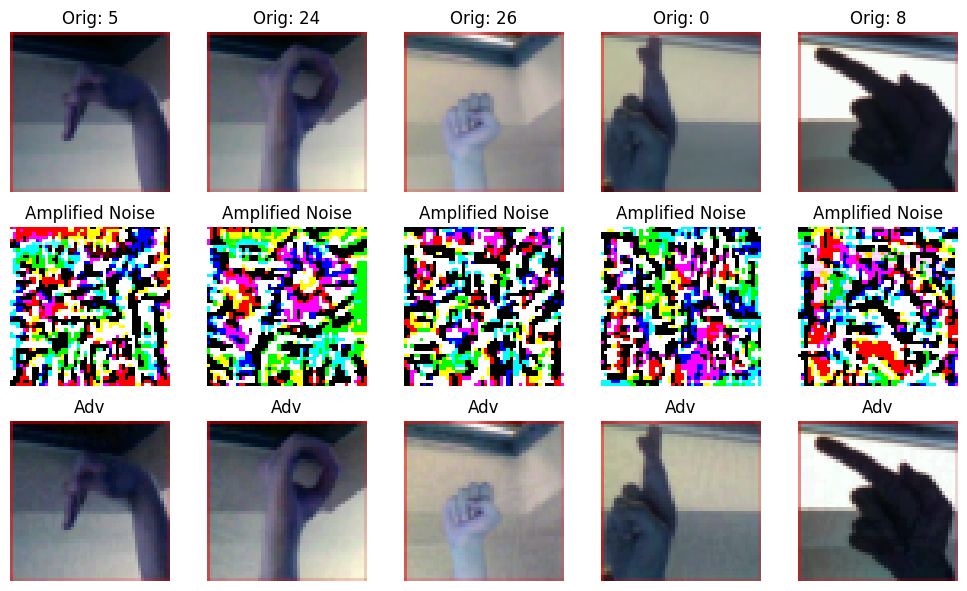

Batch 43 success rate: 0.97


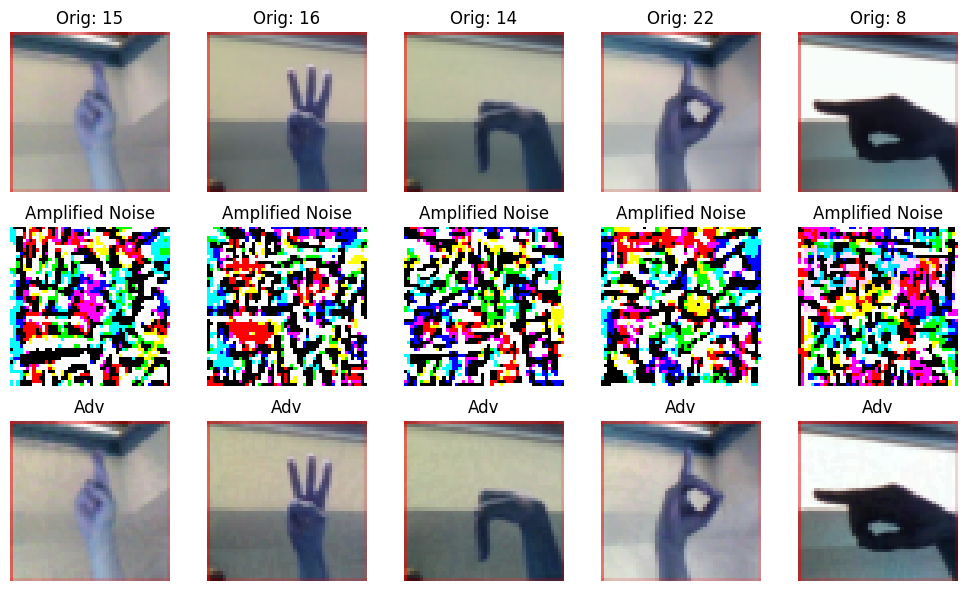

Batch 44 success rate: 0.975


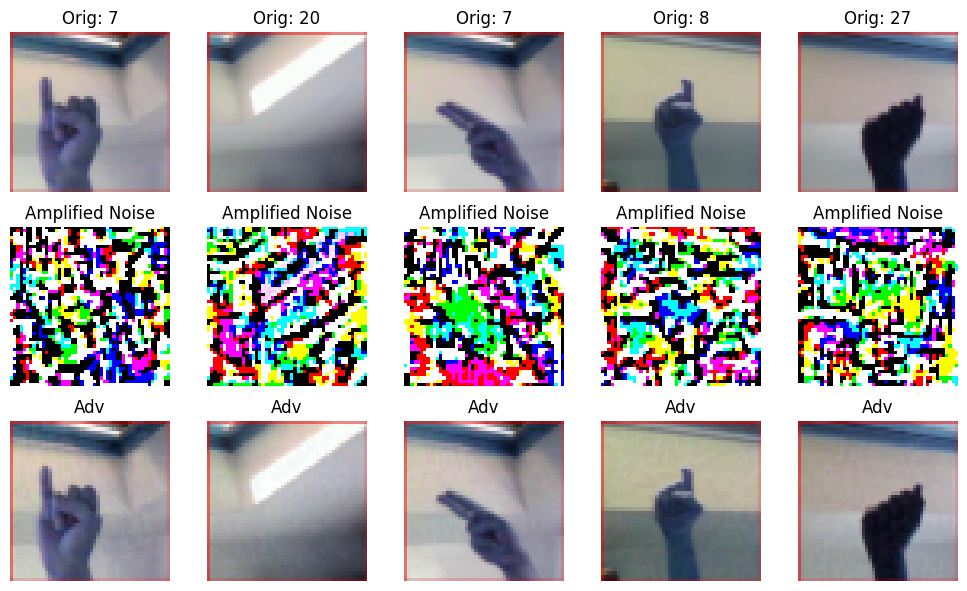

Batch 45 success rate: 0.985


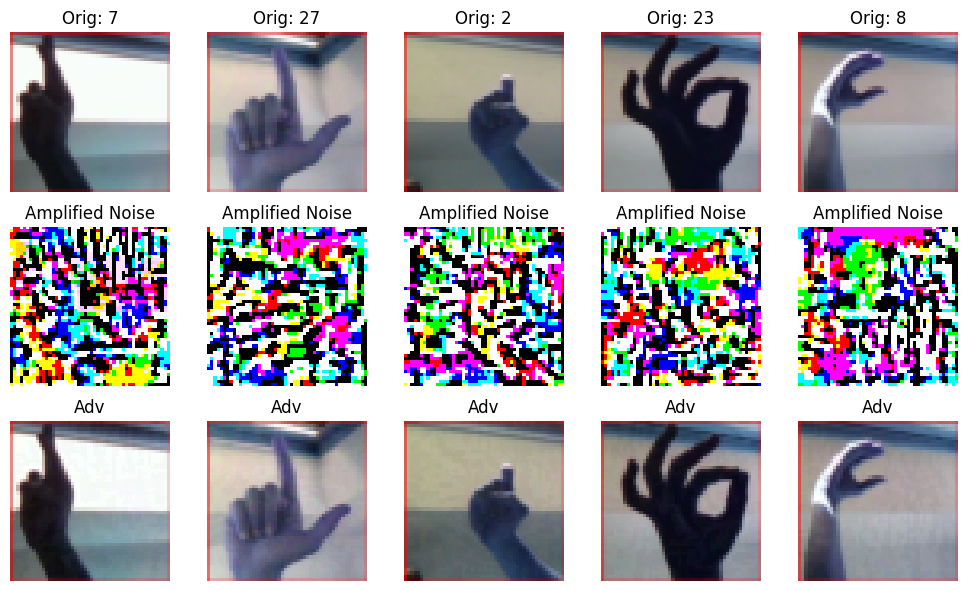

Batch 46 success rate: 0.975


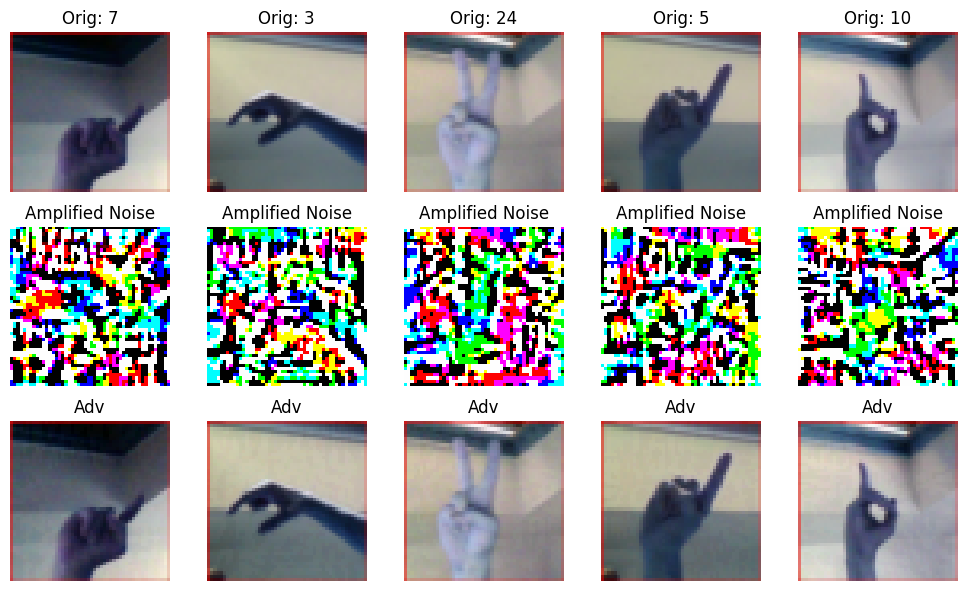

Batch 47 success rate: 0.98


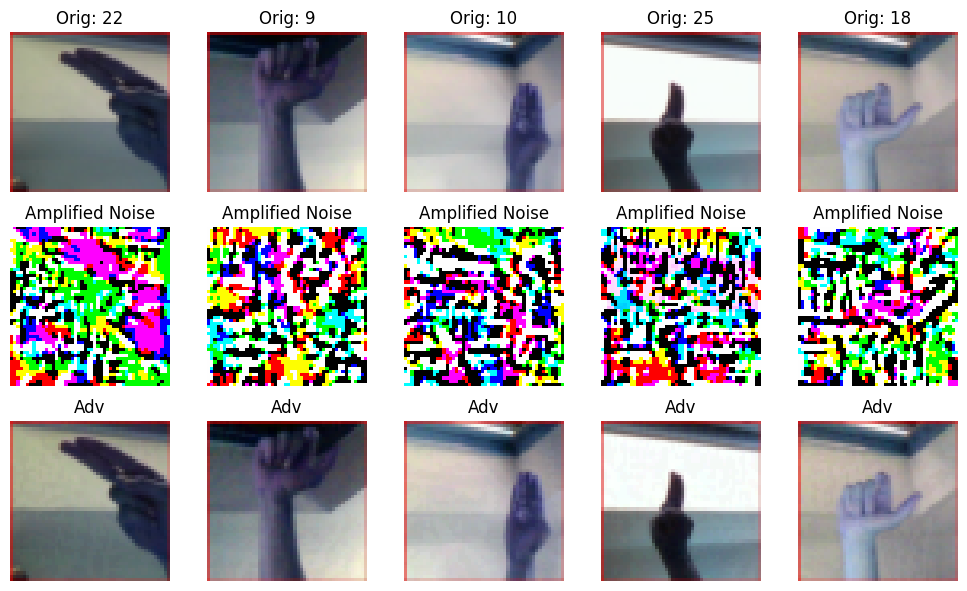

Batch 48 success rate: 0.995


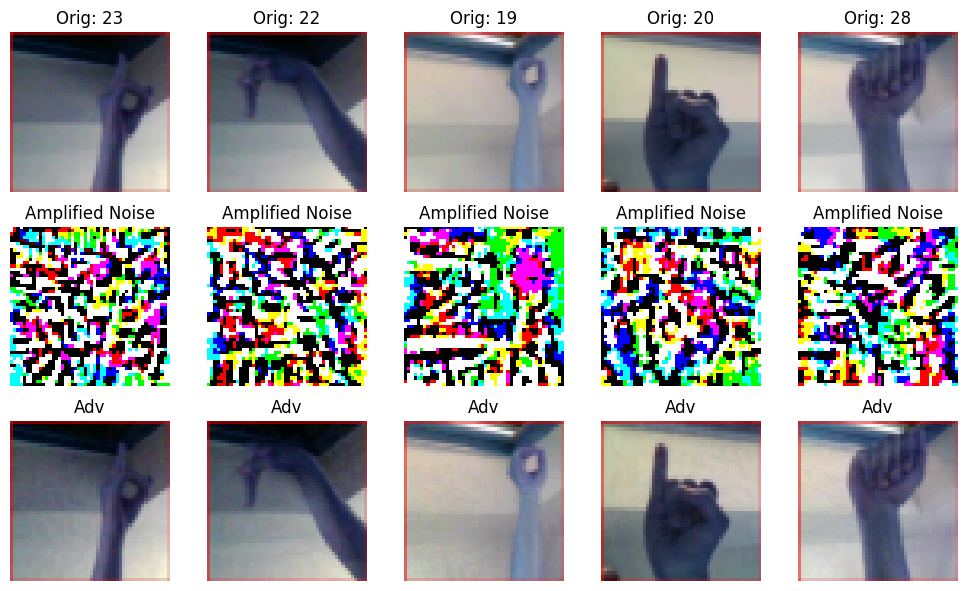

Batch 49 success rate: 0.96


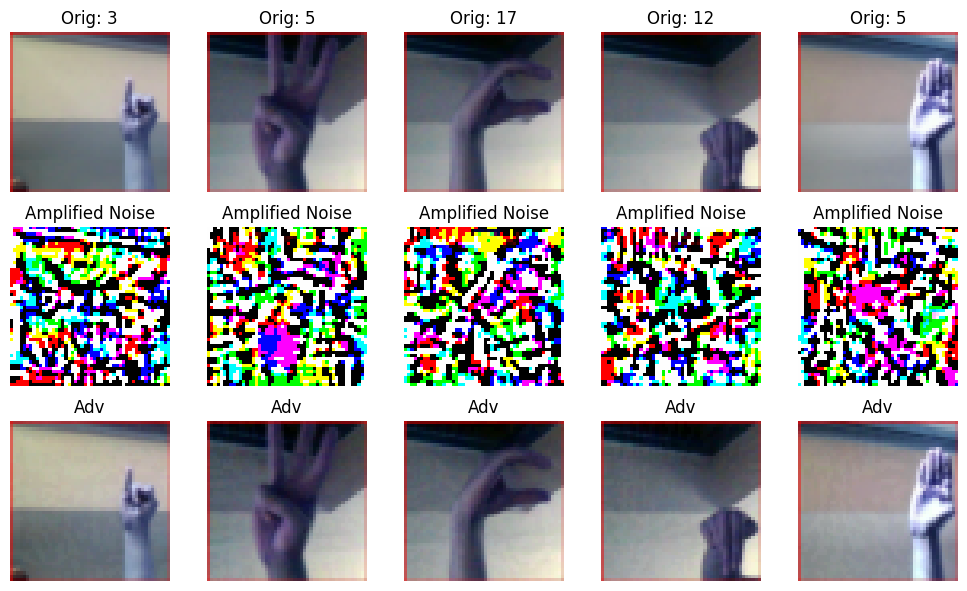

KeyboardInterrupt: 

In [103]:
# Assuming you have a batch_size defined
batch_size = 50
for i in range(0, len(images), batch_size):
    batch = images[i:i+batch_size]
    batch_labels = labels[i:i + batch_size]

    # If you have labels, you should batch them similarly
    # labels_batch = test_labels[i:i+batch_size]

    # Convert batch to TensorFlow tensor if not already
    batch_tensor = tf.convert_to_tensor(batch, dtype=tf.float32)
    

    # Define the criterion, assuming labels_batch is available
    criterion = fb.criteria.Misclassification(labels=batch_labels)

    # Apply the attack
    epsilons = [0.01, 0.1, 0.15, 0.2]
    adversarials, _, success = attack(fmodel, inputs=batch_tensor, criterion=criterion, epsilons=epsilons)


    # Display success rate for the batch
    print(f"Batch {i//batch_size} success rate:", success.numpy().mean())

    # Convert tensors to NumPy arrays for plotting
    adversarials_np = np.array([adv.numpy() for adv in adversarials]) if isinstance(adversarials, list) else adversarials.numpy()

    n=5
    # Select a subset for plotting
    selected_batch = batch[:n]  # Adjust the slice as necessary
    selected_adversarials = adversarials[0].numpy()[:n]    
    selected_labels = batch_labels[:n]  # Adjust the slice as necessary

    # Plotting images from the current batch
    plot_images(i//batch_size, selected_batch, selected_adversarials, selected_labels, n=5)

In [74]:
# # Generate an adversarial example
# epsilons = [0.01, 0.1, 0.15, 0.2] # Different strengths for the attack
# criterion = fb.criteria.Misclassification(labels=labels)

# adversarial_image, _, success = attack(fmodel, inputs=images, criterion=criterion, epsilons=epsilons)


In [75]:
# # Check if the attack was successful
# if success:
#     print("Attack successful!")
# else:
#     print("Attack failed.")